Looking at how we'll actually be calculating the turnaround point. Thinking of just going to find the first non-zero toa_efficiency for each channel as a crude start. First, let's plot the same data from trim_toa_efficiency.py, but just toa no efficiency.

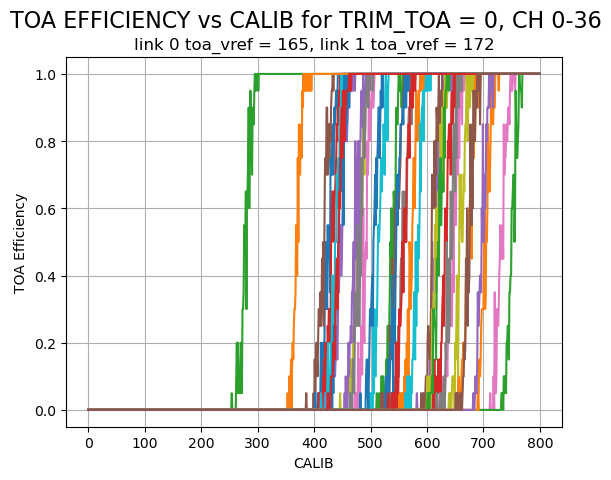

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(
    'trim_toa_scan_20250724_185419.csv',
    skiprows = 1
)

# separate the data into unique trim_toa values
unique_trim_toas = data['TRIM_TOA'].unique()
trim = unique_trim_toas[0]
trim_toa_now = data[data['TRIM_TOA'] == trim]
unique_calibs = trim_toa_now['CALIB_2V5'].unique()
# for chan in range(36, 72):
for chan in range(36):
    toa_efficiency = []
    for calib in unique_calibs:
        calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
        # count the number of non-zero TOA values for this channel
        non_zeros = calibs[calibs[str(chan)] != 0]
        chan_triggers = len(non_zeros)
        chan_toa_efficiency = chan_triggers / len(calibs)
        toa_efficiency.append(chan_toa_efficiency)
    plt.plot(unique_calibs, toa_efficiency, label=f'CH {chan}')
    # plt.plot(trim_toa_now['CALIB_2V5'], trim_toa_now['0'], linestyle = 'none', marker = 'o', alpha = .1)
plt.xlabel('CALIB')
plt.ylabel('TOA Efficiency')
# plt.ylabel('TOA')
plt.suptitle(f'TOA EFFICIENCY vs CALIB for TRIM_TOA = {trim}, CH 0-36', size=16)
plt.title('link 0 toa_vref = 165, link 1 toa_vref = 172')
plt.grid()
# plt.legend()
plt.savefig(f'toa_efficiency_TRIM_TOA_{trim}.png')
plt.show()

# plt.close()  # close the plot to avoid displaying it immediately

Printing the toa_efficiency and unique_calibs lets us see where the first non-zero value of toa_efficiency is coming. We can get the index if we 


In [3]:
# print(np.array(toa_efficiency))
# print(unique_calibs)

for i in range(len(toa_efficiency)):
    if toa_efficiency[i] != 0.0:
        val = i
        break
print(f"trim_toa is {trim}\ncalib is {unique_calibs[val]}\nat first non-zero toa_efficiency {val}")

trim_toa is 0
calib is 651
at first non-zero toa_efficiency 651


In [4]:
# now loop it for each channel, since we want this for each channel and trim_toa value combination.
# separate the data into unique trim_toa values
unique_trim_toas = data['TRIM_TOA'].unique()
trim = unique_trim_toas[0]
trim_toa_now = data[data['TRIM_TOA'] == trim]
unique_calibs = trim_toa_now['CALIB_2V5'].unique()
for chan in range(5):
    toa_efficiency = []
    for calib in unique_calibs:
        calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
        # count the number of non-zero TOA values for this channel
        non_zeros = calibs[calibs[str(chan)] != 0]
        chan_triggers = len(non_zeros)
        chan_toa_efficiency = chan_triggers / len(calibs)
        toa_efficiency.append(chan_toa_efficiency)
    for i in range(len(toa_efficiency)):
        if toa_efficiency[i] != 0.0:
            val = i
            break
    print(f"trim_toa is {trim}\ncalib is {unique_calibs[val]}\nat first non-zero toa_efficiency {val} for channel {chan}")

trim_toa is 0
calib is 407
at first non-zero toa_efficiency 407 for channel 0
trim_toa is 0
calib is 650
at first non-zero toa_efficiency 650 for channel 1
trim_toa is 0
calib is 254
at first non-zero toa_efficiency 254 for channel 2
trim_toa is 0
calib is 408
at first non-zero toa_efficiency 408 for channel 3
trim_toa is 0
calib is 419
at first non-zero toa_efficiency 419 for channel 4


In [5]:
# now that we can get the data, we need to store it into an array for later use
# need columns for trim_toa, calib, channel, that's it
# start with a numpy array and then convert to pandas DataFrame, since that's more efficient
# initialize the empty array with correct shape

array = np.array([], dtype = 'int').reshape(0, 3)  # empty array with 3 columns

# append new data to array every iteration of the loop
unique_trim_toas = data['TRIM_TOA'].unique()
for trim in unique_calibs:
    trim_toa_now = data[data['TRIM_TOA'] == trim]
    unique_calibs = trim_toa_now['CALIB_2V5'].unique()
    for chan in range(72):
        toa_efficiency = []
        for calib in unique_calibs:
            calibs = trim_toa_now[trim_toa_now['CALIB_2V5'] == calib]
            # count the number of non-zero TOA values for this channel
            non_zeros = calibs[calibs[str(chan)] != 0]
            chan_triggers = len(non_zeros)
            chan_toa_efficiency = chan_triggers / len(calibs)
            toa_efficiency.append(chan_toa_efficiency)
        for i in range(len(toa_efficiency)):
            if toa_efficiency[i] != 0.0:
                val = i
                break
        # append the data to the array
        new_row = np.array([[trim, unique_calibs[val], chan]])
        array = np.concatenate((array, new_row), axis = 0)
# but this takes like 7 seconds. And it throws an error when the last list is empty since it doesn't match dimensions. So let's find a faster way.

IndexError: index 445 is out of bounds for axis 0 with size 0

In [6]:
print(array)

[[  0 407   0]
 [  0 650   1]
 [  0 254   2]
 [  0 408   3]
 [  0 419   4]
 [  0 386   5]
 [  0 618   6]
 [  0 535   7]
 [  0 639   8]
 [  0 412   9]
 [  0 402  10]
 [  0 548  11]
 [  0 511  12]
 [  0 601  13]
 [  0 582  14]
 [  0 519  15]
 [  0 712  16]
 [  0 617  17]
 [  0 446  18]
 [  0 562  19]
 [  0 527  20]
 [  0 353  21]
 [  0 732  22]
 [  0 531  23]
 [  0 454  24]
 [  0 590  25]
 [  0 472  26]
 [  0 464  27]
 [  0 600  28]
 [  0 498  29]
 [  0 482  30]
 [  0 690  31]
 [  0 601  32]
 [  0 424  33]
 [  0 682  34]
 [  0 651  35]
 [  0 650  36]
 [  0 557  37]
 [  0 557  38]
 [  0 575  39]
 [  0 477  40]
 [  0 491  41]
 [  0 491  42]
 [  0 243  43]
 [  0 272  44]
 [  0 597  45]
 [  0 411  46]
 [  0 424  47]
 [  0 669  48]
 [  0 599  49]
 [  0 599  50]
 [  0 549  51]
 [  0 334  52]
 [  0 769  53]
 [  0 502  54]
 [  0 617  55]
 [  0 443  56]
 [  0 628  57]
 [  0 529  58]
 [  0 384  59]
 [  0 660  60]
 [  0 314  61]
 [  0 520  62]
 [  0 449  63]
 [  0 319  64]
 [  0 791  65]
 [  0 525 

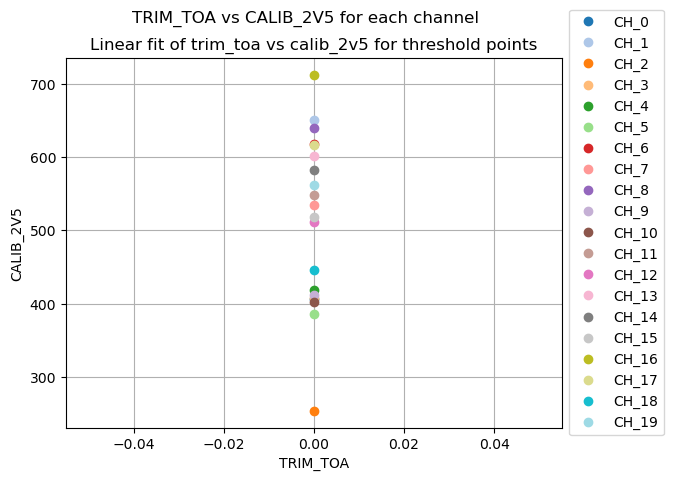

In [7]:
# now that we have the data, we could convert it to a pandas DataFrame
# or, we can just plot directly from the array, looping over the channels

# for linear regression of data points
from scipy.stats import linregress as lr
stats = pd.DataFrame(columns=['channel', 'slope', 'offset'])
import matplotlib as mpl
colors = mpl.color_sequences['tab20']

plt.figure()
for chan in range(20):
    chan_data = array[array[:, 2] == chan] # picks out the third column
    plt.plot(chan_data[:, 0], chan_data[:, 1], linestyle = 'none', marker = 'o', label = 'CH_'+str(chan), color = colors[chan])
    calib_2v5 = (chan_data[:,1])
    trim_toa = (chan_data[:,0])
    # slope, offset, r_value, p_value, slope_err = lr(trim_toa, calib_2v5)
    # stats.loc[len(stats)] = [chan, slope, offset]
    # plt.plot(trim_toa, slope * trim_toa + offset, color = colors[chan])
plt.ylabel('CALIB_2V5')
plt.xlabel('TRIM_TOA')
plt.suptitle('TRIM_TOA vs CALIB_2V5 for each channel')
plt.title('Linear fit of trim_toa vs calib_2v5 for threshold points')
plt.grid()
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.15))
plt.savefig('trim_toa_vs_calib_per_channel_lines.png')
plt.show()
# Goal is to see a descending line for each channel. But I'm kinda not seeing that yet.